In [5]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [6]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=21.5)

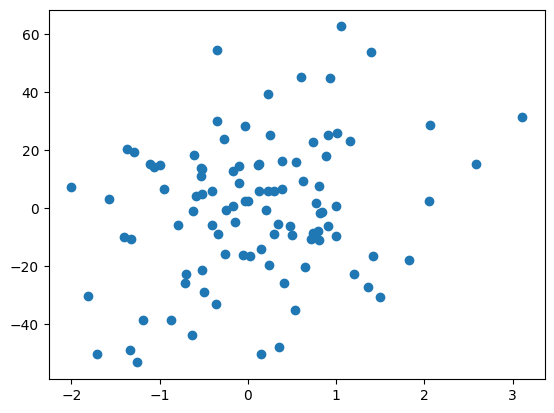

In [7]:
plt.scatter(X,y)

In [8]:
from sklearn.linear_model import SGDRegressor

In [9]:
lr=SGDRegressor()

In [10]:
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[6.30260885]
[-0.94430599]


In [11]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

np.float64(-0.30207130797499315)

In [12]:
class GDRegressor:
    def __init__(self,epochs=100,lr=0.001):
        self.epochs=epochs
        self.lr=lr
        self.m=1
        self.b=0

    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b)
            self.b=self.b-(self.lr*loss_slope_b)

            loss_slope_m=-2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            self.m=self.m-(self.lr*loss_slope_m)

        print(self.m)
        print(self.b)

    def predict(self,X):
        return self.m*X+self.b
    

In [13]:
gd=GDRegressor(100,0.001)

In [14]:
gd.fit(X,y)

6.296612050954641
-0.9366681366451494


# Batch GD

In [15]:
from sklearn.datasets import load_diabetes

In [16]:
X,y=load_diabetes(return_X_y=True)
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [22]:
blr=LinearRegression()
blr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [23]:
print(blr.coef_)
print(blr.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [24]:
y_pred=blr.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [ ]:
class Batch_GradientDescent:
    def __init__(self,lr=0.01,epochs=100):
        self.coef_=None
        self.intercept_=None
        self.lr=lr
        self.epochs=epochs

    def fit(self, X, y):
        self.intercept_ = 0
        self.coef_ = np.ones(X.shape[1])

        for i in range(self.epochs):
            y_hat = np.dot(X, self.coef_) + self.intercept_ #Vectorization

            intercept_der = -2 * np.mean(y - y_hat)
            self.intercept_ -= self.lr * intercept_der

            coef_der = -2 * np.dot((y - y_hat), X) / X.shape[0]
            self.coef_ -= self.lr * coef_der

        print(self.intercept_)
        print(self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_)+self.intercept_

In [67]:
sblr=Batch_GradientDescent(lr=0.5,epochs=1000)
sblr.fit(X,y)

152.13348416289602
[   6.48545989 -197.55638001  487.77680905  302.62085211  -42.06448864
 -106.37217491 -206.63336183  128.24940472  407.62411697  117.15643464]


In [68]:
y_pred=sblr.predict(X_test)
r2_score(y_test,y_pred)

0.46430447334695923